**Demo notebook to load trained classification model and run inference**

Download the pretrained model pipeline of the classification model from the OneDrive link shared and specify its path in the MODEL_PATH variable.

In [1]:
# Replace this with the actual path. 
MODEL_PIPELINE_PATH = "/scratch/efk7cz/NLP - Project/finetuned models/ViLT/vilt_finetuned_20"

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

from PIL import Image
import numpy as np
import requests

from transformers import pipeline

/scratch/efk7cz/anaconda3/envs/nlp_project/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/scratch/efk7cz/anaconda3/envs/nlp_project/lib/python3.10/site-packages/transformers/utils/hub.py:123: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


Load the classification model using pipeline.

In [2]:
pipe = pipeline("visual-question-answering", model=MODEL_PIPELINE_PATH, device=device)

Load a local image or from web.

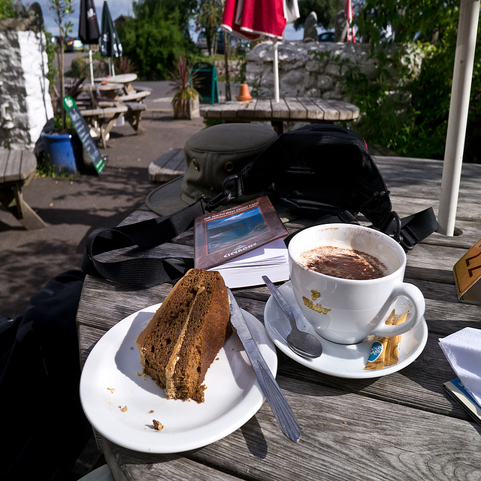

In [3]:
img_url = "http://images.cocodataset.org/train2017/000000000127.jpg"

image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

# image_path = "/path/to/local/image"
# image = Image.open(image_path).convert('RGB')

image = image.resize((min(image.size),)*2)
image

Query for an object location.

In [4]:
question = "plate"

pred = pipe(image=image, question=question, top_k=1)
print(pred)

[{'score': 0.574889600276947, 'answer': 'bottomLeft'}]


In [5]:
question = "cake"

pred = pipe(image=image, question=question, top_k=1)
print(pred)

[{'score': 0.9956921935081482, 'answer': 'bottomCenter'}]


In [6]:
question = "cup"

pred = pipe(image=image, question=question, top_k=1)
print(pred)

[{'score': 0.45703038573265076, 'answer': 'middleRight'}]
